In [1]:
from alpaca import Telescope, Camera, FilterWheel
import ciboulette.base.ciboulettepy as Cbl
import ciboulette.sector.sectorpy as Sct
import ciboulette.utils.ephemccpy as Eph
import ciboulette.utils.exposurepy as Exp
import ciboulette.utils.planningpy as Pln


#### Initialization of objects

In [2]:
cbl = Cbl.Ciboulette()
ephcc = Eph.Ephemcc()
sct = Sct.Sector()
exp = Exp.Exposure()
planning = Pln.Planning('1Yc-QxFr9veMeGjqvedRMrcEDL2GRyTS_','planning.csv')
planningtable = planning.get()

100% [..................................................................................] 291 / 291

#### Ciboulette tests

- Table test
- Filter test

In [3]:
table_cbl = cbl.ciboulettetable()

In [4]:
cbl.server = '192.168.1.18:11111'

In [5]:
cbl.server

'192.168.1.18:11111'

In [6]:
print(table_cbl)

    DRV_NAME           SERVER       DEVICE FOCAL ...  RA DEC  OBECT
---------------- ------------------ ------ ----- ... --- ---- -----
FITS astropy 4.2 192.168.1.18:11111      0  85.0 ... 0.0 90.0  INIT


In [7]:
# Initialization FilterWheel
# Device 2 for simul
filterwheel = FilterWheel(cbl.server, 2)
filterwheel.position(0)
planningtable.pprint()
plan = planningtable[0]

cbl.setfilteralpaca(filterwheel,planning.getfilter(plan))

target_name s_ra s_dec ... filters dataproduct_type      obs_title     
----------- ---- ----- ... ------- ---------------- -------------------
    SECTOR1  5.3  73.9 ...     CLS        intensity                none
    SECTOR1  5.3  70.9 ...    OIII        intensity                none
    SECTOR1  5.3  67.9 ...       L            black test black sequence
    SECTOR1  5.3  64.9 ...   SA200        intensity                none


True

In [8]:
planning.getRA(plan),planning.getDEC(plan),planning.getfilter(plan),planning.getobservationID(plan),planning.getexptime(plan)

(5.3, 73.9, 'CLS', 1, 60)

In [9]:
from astropy.table import Table
plan = Table()
plan['target_names'] = ['M1']
plan['s_ra'] = ['5.24']
plan['s_dec'] = ['42.64']
plan['t_exptime'] = ['300']
plan['obs_id'] = ['251']
plan['binning'] = ['1']
plan['filters'] = ['SA200']
plan['dataproduct_type'] = ['light']
plan['obs_title'] = ['none']

planning.getRA(plan)[0],planning.getDEC(plan)[0],planning.getfilter(plan)[0],planning.getobservationID(plan)[0]

('5.24', '42.64', 'SA200', '251')

#### Ephemcc class tests

The Alpaca class is used to test the movement of the telescope

In [10]:
cbl.site_lat = 40.235
ephcc.observer = cbl.ephemccgetobserver()
ephcc.observer 

'-0.3531%2040.235%20100'

In [11]:
ephcc.setep('2021-02-11T22:00:00')
ephcc.setndb(10)
print(ephcc.get())

100% [................................................................................] 7984 / 7984  target          epoch                ra      ...     ddec       dist_dot  
                                    "h:m:s"    ... arcsec / min    km / s   
--------- ---------------------- ------------- ... ------------ ------------
C/2020 M3 2021-02-11T22:00:00.00 05 47 50.8889 ...     -0.10176   30.9442019
C/2020 M3 2021-02-12T22:00:00.00 05 49 15.5292 ...     -0.10831   31.1395724
C/2020 M3 2021-02-13T22:00:00.00 05 50 41.2519 ...     -0.11459   31.3321177
C/2020 M3 2021-02-14T22:00:00.00 05 52  8.0186 ...     -0.12063   31.5218233
C/2020 M3 2021-02-15T22:00:00.00 05 53 35.7905 ...     -0.12643   31.7086962
C/2020 M3 2021-02-16T22:00:00.00 05 55  4.5291 ...     -0.13201   31.8927572
C/2020 M3 2021-02-17T22:00:00.00 05 56 34.1957 ...     -0.13738   32.0740354
C/2020 M3 2021-02-18T22:00:00.00 05 58  4.7521 ...     -0.14255   32.2525639
C/2020 M3 2021-02-19T22:00:00.00 05 59 36.1608 ...    

In [25]:
from astropy import units as u
from astropy.coordinates import SkyCoord, Angle
from astropy.io.votable import parse_single_table


table = parse_single_table(ephcc.filename).to_table()
table

target,epoch,ra,dec,distance,mv,phase,elongation,dracosdec,ddec,dist_dot
,,"""h:m:s""","""d:m:s""",AU,,deg,deg,arcsec / min,arcsec / min,km / s
str20,str24,str13,str13,float64,float32,float64,float64,float64,float64,float64
C/2020 M3,2021-02-11T22:00:00.00,05 47 50.8889,+48 31 7.850,1.304197755,16.970,25.03,121.0,0.56001,-0.10176,30.9442019
C/2020 M3,2021-02-12T22:00:00.00,05 49 15.5292,+48 28 46.942,1.322067184,17.040,25.08,120.35,0.56844,-0.10831,31.1395724
C/2020 M3,2021-02-13T22:00:00.00,05 50 41.2519,+48 26 16.885,1.34004724,17.110,25.12,119.71,0.57665,-0.11459,31.3321177
C/2020 M3,2021-02-14T22:00:00.00,05 52 8.0186,+48 23 38.040,1.358136295,17.180,25.16,119.07,0.58462,-0.12063,31.5218233
C/2020 M3,2021-02-15T22:00:00.00,05 53 35.7905,+48 20 50.751,1.376332722,17.240,25.2,118.43,0.59235,-0.12643,31.7086962
C/2020 M3,2021-02-16T22:00:00.00,05 55 4.5291,+48 17 55.339,1.394634902,17.310,25.23,117.8,0.59985,-0.13201,31.8927572
C/2020 M3,2021-02-17T22:00:00.00,05 56 34.1957,+48 14 52.112,1.413041228,17.380,25.26,117.16,0.60712,-0.13738,32.0740354
C/2020 M3,2021-02-18T22:00:00.00,05 58 4.7521,+48 11 41.355,1.431550113,17.450,25.28,116.53,0.61416,-0.14255,32.2525639


In [26]:
c = SkyCoord(table['ra'], table['dec'], unit='deg', frame='icrs')
c.ra.degree*15,c.dec.degree

(array([86.96203708, 87.314705  , 87.67188292, 88.03341083, 88.39912708,
        88.76887125, 89.14248208, 89.51980042, 89.90067   , 90.284935  ]),
 array([48.51884722, 48.47970611, 48.43802361, 48.3939    , 48.34743083,
        48.29870528, 48.24780889, 48.19482083, 48.13981722, 48.08286917]))

In [13]:
# Initialisation Telescope
cbl.device = 1
telescope = Telescope(cbl.server, cbl.device)
telescope.sitelatitude(cbl.site_lat)
telescope.sitelongitude(cbl.site_long)
telescope.unpark()
telescope.tracking(True)

In [15]:
RA = c.ra.deg[0]
DEC = c.dec.deg[0]
RA = 4.00
DEC = 36.22

# Déplacement
telescope.slewtocoordinates(RA,DEC)

#### Check sofware tests

In [16]:
sectortable = sct.readarchives(cbl.archive_table)

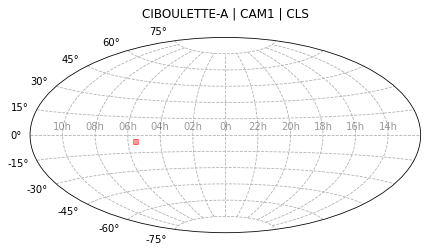

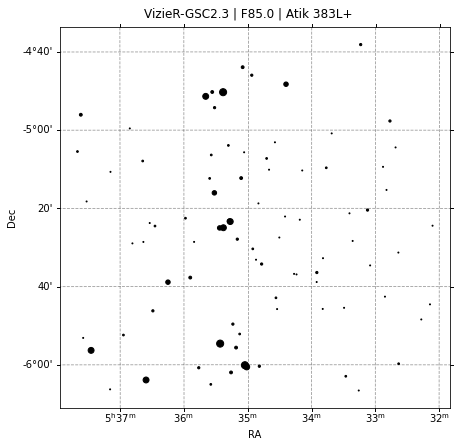

In [17]:
cbl.ra = 5.58
cbl.dec = -5.36
cbl.projections(sectortable)
cbl.starmap()

#### Planning tests

Reading a google drive file and transforms it into a planning table

In [18]:
planningtable[0:3]

target_name,s_ra,s_dec,t_exptime,obs_id,binning,filters,dataproduct_type,obs_title
str7,float64,float64,int32,int32,int32,str5,str9,str19
SECTOR1,5.3,73.9,60,1,1,CLS,intensity,none
SECTOR1,5.3,70.9,60,2,1,OIII,intensity,none
SECTOR1,5.3,67.9,60,3,1,L,black,test black sequence


In [19]:
plan = planningtable[2]
exp.setexptime(planning.getexptime(plan))
exp.setnumber(planning.getobservationID(plan))

True

In [20]:
exp.getexptime(),exp.getnumber()

(60, 3)

#### Exposure class tests

In [21]:
exp.todaytonumber()

True

In [22]:
exp.getnumber()

'20210211224636'

In [23]:
exp.setexptime(200)

True

In [24]:
exp.getexptime()

200